In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# load and read data
diabetes = pd.read_csv('drive/MyDrive/Aplikasi Pembelajaran Mesin/Pertemuan 1/Dataset/diabetes.csv')
diabetes

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [77]:
# data description
# melihat informasi data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [71]:
# preprocessing

# check null data
diabetes.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [72]:
# check CLASS category
print(diabetes['CLASS'].unique())

# modified
diabetes['CLASS'] = diabetes['CLASS'].replace('Y ','Y')
diabetes['CLASS'] = diabetes['CLASS'].replace('N ','N')
print(diabetes['CLASS'].unique())

['N' 'N ' 'P' 'Y' 'Y ']
['N' 'P' 'Y']


In [73]:
# data features and data target
x = diabetes.iloc[:, 3:13]
y = diabetes.iloc[:, -1]

sc = StandardScaler()
x = sc.fit_transform(x)

#split data train and data test
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [74]:
# logistic regression

model = LogisticRegression(multi_class="multinomial", solver='lbfgs')
model.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

Accuracy Score: 0.94


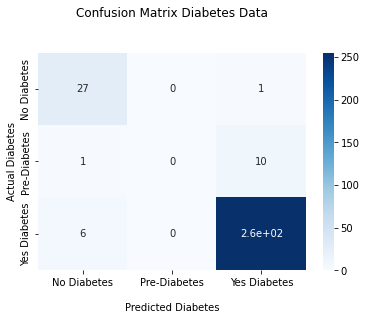

In [75]:
# predict

y_predict = model.predict(x_test)
print('Accuracy Score:', metrics.accuracy_score(y_test, y_predict))  

cf_matrix = metrics.confusion_matrix(y_test, y_predict)

ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues")
ax.set_title('Confusion Matrix Diabetes Data\n\n')
ax.set_xlabel('\nPredicted Diabetes')
ax.set_ylabel('Actual Diabetes')

ax.xaxis.set_ticklabels(['No Diabetes', 'Pre-Diabetes', 'Yes Diabetes'])
ax.yaxis.set_ticklabels(['No Diabetes', 'Pre-Diabetes', 'Yes Diabetes'])
plt.show()

In [76]:
#memasukkan angka acak ke explanatory variabel untuk menghasilkan output class diabetes
trial = np.array([[71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0]])
pred_trial = model.predict(trial)
print(pred_trial)


['Y']
